<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/XGen_7B_Long_Sequence_Modeling_with_(up_to)_8K_Tokens_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia

/bin/bash: nvidia: command not found


In [2]:
!pip install -qU pip

In [3]:
!pip install -U git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-mhk2de18
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-mhk2de18
  Resolved https://github.com/huggingface/transformers to commit 66a378429d0e085e4e72bc63a4147889a3b65a14
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.6 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.31.0.dev0-py3-none-any.whl size=7283286 sha256=bc616bd95a065d8453b8e9096cecd3711c81a233beae024d2ff6334685099970
  Stored in directory: /tmp/pip-ephem-wheel-cache-_f1jdt09/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully

In [4]:
!pip install -qU tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.3 MB/s eta 0:00:00


In [5]:
!pip install -qU git+https://github.com/huggingface/accelerate

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [6]:
!pip install -qU git+https://github.com/huggingface/accelerate

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [7]:
!pip install -qU bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 MB 12.3 MB/s eta 0:00:00


In [9]:
import textwrap
import torch
from transformers import GenerationConfig,AutoTokenizer,AutoModelForCausalLM

In [10]:
tokenizer = AutoTokenizer.from_pretrained("Salesforce/xgen-7b-8k-inst", trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained("Salesforce/xgen-7b-8k-inst",
                                             torch_dtype=torch.bfloat16,
                                             load_in_8bit = True,
                                             device_map='auto')


A new version of the following files was downloaded from https://huggingface.co/Salesforce/xgen-7b-8k-inst:
- tokenization_xgen.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
Using unk_token, but it is not set yet.
Using unk_token, but it is not set yet.



===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so.11.0
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: /usr/lib64-nvidia did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('8013'), PosixPath('//172.28.0.1'), PosixPath('http')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('--logtostderr --listen_host=172.28.0.12 --

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

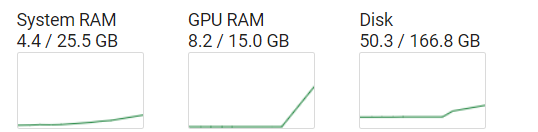

In [11]:
model.config

LlamaConfig {
  "_name_or_path": "Salesforce/xgen-7b-8k-inst",
  "architectures": [
    "LlamaForCausalLM"
  ],
  "bos_token_id": 50256,
  "eos_token_id": 50256,
  "hidden_act": "silu",
  "hidden_size": 4096,
  "initializer_range": 0.02,
  "intermediate_size": 11008,
  "max_position_embeddings": 8192,
  "model_type": "llama",
  "num_attention_heads": 32,
  "num_hidden_layers": 32,
  "pad_token_id": 0,
  "quantization_config": {
    "bnb_4bit_compute_dtype": "float32",
    "bnb_4bit_quant_type": "fp4",
    "bnb_4bit_use_double_quant": false,
    "llm_int8_enable_fp32_cpu_offload": false,
    "llm_int8_has_fp16_weight": false,
    "llm_int8_skip_modules": null,
    "llm_int8_threshold": 6.0,
    "load_in_4bit": false,
    "load_in_8bit": true
  },
  "rms_norm_eps": 1e-06,
  "tie_word_embeddings": false,
  "torch_dtype": "bfloat16",
  "transformers_version": "4.31.0.dev0",
  "use_cache": true,
  "vocab_size": 51200
}

In [12]:
model.generation_config

GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 50256,
  "eos_token_id": 50256,
  "transformers_version": "4.31.0.dev0"
}

In [13]:
generation_config = model.generation_config
generation_config.max_new_tokens = 128
generation_config.pad_token_id = tokenizer.eos_token_id

In [15]:
system_prompt = "A chat between a curious human and an artificial intelligence assiatant.The assiatant gives helpful,detailed,and polite answers to the human's question.\n\n"
prompt = f"### Human : What is Photosynthesis? Answer in 1 sentence.\n###"
#
print(system_prompt + prompt)

A chat between a curious human and an artificial intelligence assiatant.The assiatant gives helpful,detailed,and polite answers to the human's question.

### Human : What is Photosynthesis? Answer in 1 sentence.
###


In [17]:
%%time
inputs = tokenizer(system_prompt + prompt,return_tensors="pt").to(model.device)
with torch.inference_mode():
  generations = model.generate(**inputs,generation_config=generation_config)

/usr/local/lib/python3.10/dist-packages/bitsandbytes/autograd/_functions.py:321: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


CPU times: user 7.85 s, sys: 294 ms, total: 8.14 s
Wall time: 10.9 s


In [18]:
generations

tensor([[   32,  8537,  1022,   257, 11040,  1692,   290,   281, 11666,  4430,
           840,  5375,   415,    13,   464,   840,  5375,   415,  3607,  7613,
            11, 15255,  6255,    11,   392, 23507,  7429,   284,   262,  1692,
           338,  1808,    13,   198,   198, 21017,  5524,  1058,  1867,   318,
          9434, 44411,    30, 23998,   287,   352,  6827,    13,   198, 21017,
         15286,    25,  9434, 44411,   318,   257,  1429,   416,   543,  6134,
           779, 19606,    11,  1660,    11,   290,  6588, 17556,   284,  2251,
         11863,   290,  2568,   287,   262,  1296,   286,  7543,    13,   198,
         50256]], device='cuda:0')

In [19]:
response = tokenizer.decode(generations[0],skip_special_tokens=True)

In [22]:
response.split("### Assistant:")[-1].strip()

'Photosynthesis is a process by which plants use sunlight, water, and carbon dioxide to create oxygen and energy in the form of sugar.'

In [44]:
def generate_text(prompt):
  inputs = tokenizer(prompt,return_tensors="pt").to(model.device)
  with torch.inference_mode():
    generations = model.generate(**inputs,generation_config=generation_config)

  response = tokenizer.decode(generations[0],skip_special_tokens=True)
  #print(response)
  #out = response.split("### Assistant:")[-1].strip()
  return response

In [46]:
%%time
prompt = f"### What is the capital of India?\n"
query = system_prompt + prompt
generate_text(query).split("### Assistant:")[-1].strip()

CPU times: user 2.96 s, sys: 0 ns, total: 2.96 s
Wall time: 2.96 s


'New Delhi is the capital of India.'